## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

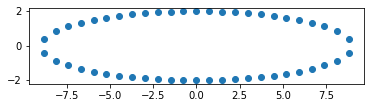

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)
print(X.shape),print(Y.shape)

(50,)
(50,)


(None, None)

In [ ]:
X.shape,Y.shape

((50,), (50,))

<pre>
<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) 
<img src='https://i.imgur.com/FctjBiD.png'> 
in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

8. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

In [5]:
X,Y
outliers= [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]

In [6]:
X.shape

(50,)

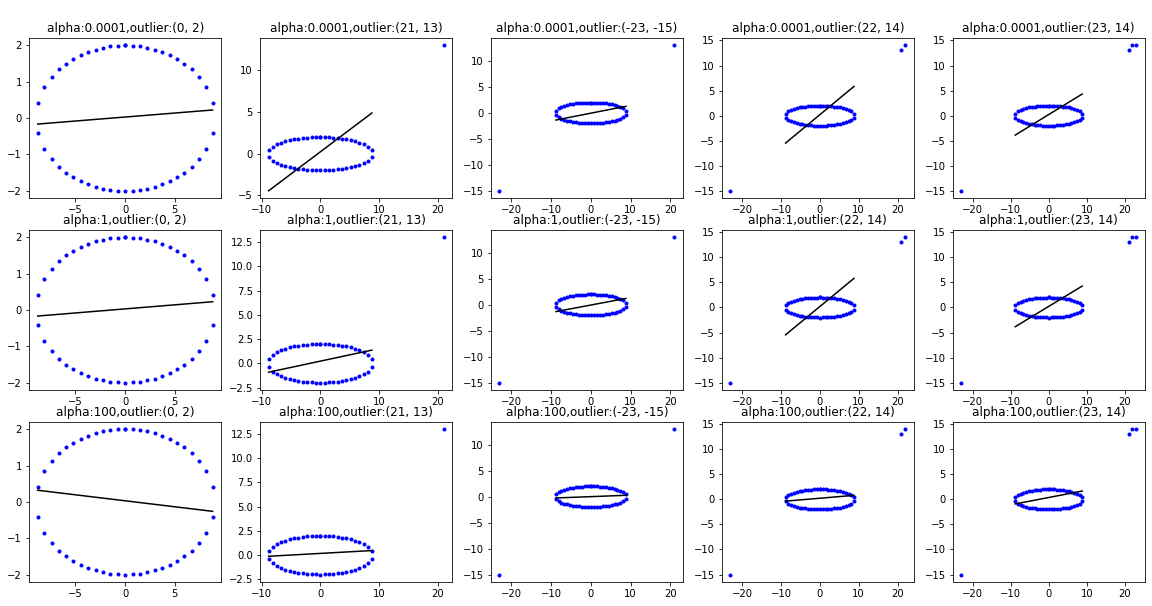

In [7]:
alpha=[0.0001, 1, 100]
outliers= [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]

fig,axs=plt.subplots(nrows=3,ncols=5,figsize=(20,10))
for idx1,regul in enumerate(alpha):
  X_tr,Y_tr=X,Y   #INITIALISING X_tr ,Y_tr
  for idx2,out in enumerate(outliers):
    X_tr=np.append(X_tr,out[0]).reshape(-1,1) #ADDING OUTLIERS 
    Y_tr=np.append(Y_tr,out[1]).reshape(-1,1) #ADDING OUTLIERS
    regressor=SGDRegressor(loss='squared_loss',alpha=regul,eta0=0.01,random_state=42) #DEFINE REGRESSOR
    regressor.fit(X_tr,Y_tr)
    coef=regressor.coef_     #COEFFIENT FOR LINEAR HYPERPLANE
    intercept=regressor.intercept_ #INTERCEPT
    #regressor.average_coef_
    #regressor.average_intercept_
    axs[idx1,idx2].scatter(X_tr,Y_tr,marker='.',color='b') #PLOTTING SCATTER[0,0],[0,1]...[0,4] FOR EACH REGULARISATION PARAMETER(3)==>3*5=15PLOTS

    mi,ma=np.min(X),np.max(X) ## DEFINING RANGE FOR HYPERPLANE
    ##POINTS:y=mx+c ===>([y_min,(m*(x_min)+intercept)],[y_max,(m*(x_max)+intercept)])
    points=np.array(([mi,(coef[0]*mi + intercept[0])],[ma,(coef[0]*ma + intercept[0])]))
    axs[idx1,idx2].plot(points[:,0],points[:,1],color='black')                                           
    axs[idx1,idx2].set_title("\nalpha:{},outlier:{}".format(regul,out))


In [ ]:
CONCLUSION: SINCE ABOVE IS A LINEAR REGRESSION PROBLEM WHERRIN WE WERE TO FIND OUT BEST FIT LINE AND INTERNALLY IT SOLVES SQUARED LOSS FUNCTION IN OPTIMISATION/
PROBLEM : (Y_PRED - Y_TRUE)^2 which is nothing but squared loss but as we can see it is highly prone to get affected by outliers because this squared loss which/
might give us faulty weights changes drastically with magnitude of outliers present in data .
IN ORDER TO COUNTER THE EFFECT OF OUTLIERS WE ADD REGULARISATION TERM i.e ALPHA * (WEIGHT)^2 WHERE ALPHA IS REGULARISATION STRENGTH.VALUE OF ALPHA IS PROPORTIONAL/
TO HOW ROBUST OUR MODEL IS TO BE MADE ,HERE ALPHA * (WEIGHTS)^2 ID SQUARED REGRESSION WHICH IS THE CASE OF RIDGE REGRESSION THAT REDUCES THE MAGNUTUDE OF WEIGHTS /
AND IN TURN MULTICOLLINEARITY BY REDUCING THE MAGNITUDE OF HIGH WEIGHTS.
